<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [3]:
import re

def tokenize(doc):
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', doc)
    tokens = tokens.lower().split()
    return tokens

In [4]:
yelp['tokens'] = yelp['text'].apply(tokenize)
yelp['tokens'].head()

0    [beware, fake, fake, fakewe, also, own, a, sma...
1    [came, here, for, lunch, togo, service, was, q...
2    [ive, been, to, vegas, dozens, of, times, and,...
3    [we, went, here, on, a, night, where, they, cl...
4    [35, to, 4, starsnot, bad, for, the, price, 12...
Name: tokens, dtype: object

In [5]:
yelp['tokens'].shape

(10000,)

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
nlp = spacy.load("en_core_web_lg")

In [4]:
# First attempts to vectorize didn't work well, switched from Tfidf to CountVectorizer

# tfidf = TfidfVectorizer(stop_words='english')
# vect = [nlp(doc).vector for doc in yelp['text']]
# vect.transform((yelp['text']))
# sparse = tfidf.fit_transform(yelp['text'])

vect = CountVectorizer(stop_words='english', min_df=0.05, max_df=0.90)

In [5]:
vect.fit(yelp['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=None, min_df=0.05,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [6]:
# creating Document Term Matrix

sparse_dtm = vect.transform(yelp['text'])

In [9]:
dtm = pd.DataFrame(sparse_dtm.todense(), columns=vect.get_feature_names())
print(dtm.shape)
dtm.head()

(10000, 116)


,10,amazing,area,asked,away,awesome,bad,bar,best,better,...,vegas,wait,want,wanted,wasn,way,went,work,worth,years
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix = cosine_similarity(dtm)

dist = pd.DataFrame(dist_matrix)

dist.shape

(10000, 10000)

In [12]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')

nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [13]:
nn.kneighbors(dtm)

(array([[0.        , 2.        , 2.        , ..., 2.44948974, 2.44948974,
         2.44948974],
        [0.        , 1.73205081, 2.        , ..., 2.        , 2.        ,
         2.        ],
        [0.        , 4.47213595, 4.79583152, ..., 5.19615242, 5.19615242,
         5.19615242],
        ...,
        [0.        , 2.23606798, 2.44948974, ..., 2.44948974, 2.44948974,
         2.44948974],
        [0.        , 3.16227766, 3.31662479, ..., 3.46410162, 3.46410162,
         3.46410162],
        [0.        , 7.48331477, 7.54983444, ..., 8.1240384 , 8.18535277,
         8.24621125]]), array([[   0, 3428, 3133, ..., 7902, 8450, 8006],
        [   1, 4626, 8646, ..., 4055, 1425, 6058],
        [   2,  840, 2436, ..., 6240, 5683, 7449],
        ...,
        [9997, 5209, 2939, ..., 2828,  622, 3189],
        [9998, 7783, 7069, ..., 5613, 3918, 2089],
        [9999, 3829, 3393, ..., 9622, 1393, 3900]]))

In [14]:
sample_review = ['The pizza was pretty good, BUT the tacos absolutely sucked. Loved our waitress tho']

In [17]:
# Returning similar yelp reviews to sample

new = vect.transform(sample_review)

nn.kneighbors(new.todense())

(array([[1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.41421356]]),
 array([[6781, 4403, 5207, 8481, 3222,  744, 4663,  424, 7397,  469]]))

In [24]:
# Printing out top similar reviews to made up example

print(yelp['text'][6781][:100])
print(yelp['text'][4403][:100])
print(yelp['text'][5207][:100])
print(yelp['text'][8481][:100])
print(yelp['text'][3222][:100])
print(yelp['text'][744][:100])
print(yelp['text'][4663][:100])
print(yelp['text'][424][:100])
print(yelp['text'][7397][:100])
print(yelp['text'][469][:100])


First time here Ashley was my sever. She was pretty good point out which dishes are the popular ones
They Always have water. Ive been getting h2o here for about 6-8 months. Never have had an issue .The
Food is good. Pretty similar to the Texas Rudy's. But the atmosphere is not. It's "Welcome to Rudy's
Good coffee.  Scramble cold, very over done eggs, toast was the heal of the loaf served without butt
Hipsters unite. Good salsa! Average wraps.
Pretty damn good. I had the Fettuccine Carbonara.  Very creamy.  Crabcakes were delicious as well.
Spendy for breakfast but still good food.  Music pretty loud for the breakfast crowd. Too loud in fa
Seriously? Jellyfish dish no jellyfish, there is only cabbage and carrot. Noodles tastes not that go
Avocado ice cream. Do it. Also they have tamales in the winter. And add the flan/cake if you feeling
O  o  thenk 6nnn  .b  cgv  xx TV cvg  9 nvehxcfvvv3c nb b  c  y4  nb and the vghvhridd h 0d  c      


## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
vect = TfidfVectorizer(stop_words='english')
sgdc = SGDClassifier()
pipe = Pipeline([('vect', vect), ('clf', sgdc)])

In [11]:
# Training pipeline to predict star reviews based on text reviews

target = yelp['stars']
train = yelp['text']

pipe.fit(train, target)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patte...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

In [16]:
# My sample review had two positive statements
# The positives won out in the prediction with 5 stars

sample_stars = pipe.predict(sample_review)
sample_stars

array([5])

In [17]:
# Using gridsearch to determine the best metric between two different parameters

from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'clf__max_iter': (20, 10, 100)
}

In [18]:
grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(train, target)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   25.9s finished
/Users/mattmastin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

In [19]:
grid_search.best_params_

{'clf__max_iter': 10, 'vect__max_df': 0.75}

In [20]:
grid_search.best_score_

0.6106

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [25]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

In [26]:
STOPWORDS = set(STOPWORDS)

def tokenize2(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [35]:
yelp['text'] = yelp['text'].apply(tokenize2)
 
id2word = corpora.Dictionary((yelp['text']))

In [37]:
corpus = [id2word.doc2bow(text) for text in yelp['text']]

In [33]:
len(id2word.keys())

26474

In [38]:
lda = LdaMulticore(corpus=corpus,
                  id2word=id2word,
                  num_topics=15,
                  passes=10,
                  workers=4)

In [39]:
lda.print_topics()

[(0,
  '0.018*"good" + 0.016*"food" + 0.013*"place" + 0.011*"great" + 0.009*"service" + 0.008*"like" + 0.007*"time" + 0.007*"cheese" + 0.007*"ordered" + 0.006*"chicken"'),
 (1,
  '0.013*"cream" + 0.012*"ice" + 0.005*"like" + 0.005*"love" + 0.005*"flavor" + 0.005*"good" + 0.005*"place" + 0.004*"service" + 0.004*"time" + 0.004*"ordered"'),
 (2,
  '0.023*"food" + 0.011*"like" + 0.008*"place" + 0.008*"good" + 0.007*"came" + 0.007*"service" + 0.006*"table" + 0.006*"ordered" + 0.006*"minutes" + 0.005*"restaurant"'),
 (3,
  '0.023*"food" + 0.016*"good" + 0.013*"place" + 0.010*"great" + 0.009*"service" + 0.009*"chicken" + 0.007*"restaurant" + 0.006*"little" + 0.006*"menu" + 0.006*"like"'),
 (4,
  '0.006*"people" + 0.006*"ramen" + 0.005*"like" + 0.004*"staff" + 0.004*"think" + 0.004*"food" + 0.004*"great" + 0.004*"vegas" + 0.004*"place" + 0.004*"best"'),
 (5,
  '0.013*"time" + 0.012*"place" + 0.010*"great" + 0.009*"service" + 0.007*"food" + 0.007*"like" + 0.006*"got" + 0.005*"right" + 0.005*"sa

In [42]:
words = [re.findall(r'"([^"]*)"', t[1]) for t in lda.print_topics()]

In [45]:
topics = [' '.join(t[0:3]) for t in words]

In [46]:
for t in topics:
    print(t)
    print('\n')

good food place


cream ice like


food like place


food good place


people ramen like


time place great


place time went


great hair time


place great food


room hotel place


like got time


day time pool


good like place


great service love


service car customer




In [47]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [48]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.123357 -0.036991       1        1  19.267979
3     -0.099658 -0.042122       2        1  14.731111
5      0.048632 -0.043386       3        1  12.100913
14     0.188754 -0.062734       4        1   9.253749
6      0.060256 -0.037424       5        1   6.081156
8     -0.044533 -0.036937       6        1   5.834519
9      0.030188  0.023224       7        1   5.743396
2     -0.098060 -0.040417       8        1   4.615576
10     0.034935 -0.053441       9        1   4.093926
12    -0.132974  0.025475      10        1   3.910156
11     0.138861  0.071202      11        1   3.728505
7      0.049747 -0.017263      12        1   3.177432
13    -0.001256  0.006374      13        1   2.862228
1     -0.063303  0.073356      14        1   2.581634
4      0.011770  0.171083      15        1   2.017715, topic_info=    Category         Freq        Term        Total  loglift  logprob
144  Default  4940.000000        food  4940.000000  30.0000  30.0000
208  Default  4269.000000       great  4269.000000  29.0000  29.0000
103  Default   934.000000        room   934.000000  28.0000  28.0000
45   Default  3741.000000     service  3741.000000  27.0000  27.0000
771  Default   512.000000       cream   512.000000  26.0000  26.0000
..       ...          ...         ...          ...      ...      ...
75   Topic15    22.339724         got  2037.049683  -0.6097  -6.0730
358  Topic15    21.508686  definitely  1416.803345  -0.2845  -6.1109
310  Topic15    21.429758         try  1409.787354  -0.2832  -6.1146
115  Topic15    21.322727          ve  1894.502075  -0.5837  -6.1196
313  Topic15    20.613850        want   996.617676   0.0248  -6.1534

[1281 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
26100     14  0.760109            abdc
16569      1  0.891683           aburi
17454      5  0.954287  accommodations
11533      5  0.896017         acetone
12538      7  0.886803  acknowledgment
...      ...       ...             ...
2655      15  0.697035         youtube
13097     13  0.959537             yuk
24671      2  0.924921            zane
25517     12  0.902772          zocalo
10692     11  0.919185           était

[4381 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 6, 15, 7, 9, 10, 3, 11, 13, 12, 8, 14, 2, 5])

In [51]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        texts = yelp['text']
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word,
                            workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary,
                                       coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [52]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                       corpus=corpus,
                                                       path=yelp['text'],
                                                       start=2,
                                                       limit=40,
                                                       step=6)

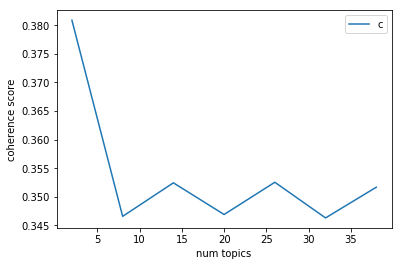

In [54]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('num topics')
plt.ylabel('coherence score')
plt.legend(('coherence values'), loc='best')
plt.show();

In [55]:
yelp.describe()

,cool,funny,stars,useful
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.564800,0.468900,3.735800,1.363600
std,2.040298,1.801043,1.461647,3.129085
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000
50%,0.000000,0.000000,4.000000,0.000000
75%,0.000000,0.000000,5.000000,2.000000
max,61.000000,79.000000,5.000000,62.000000


## Analysis

From looking at the topics, it appears that the majority of reviews are positive - which is corroborated by the mean 'stars' of 3.7 and mode of 4. Reviewers tend to comment on extreme service - either 'great!' or 'absolutely terrible!'  Common food types are some of the most popular restaurant items: burgers, fries, pizza, sushi, Mexican.

There aren't many cities listed, but Las Vegas is - presumably people comment less on the specific city when at home than on vacation.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)